In [3]:
# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
# import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [31]:
# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

rwd_node = 116
frame_rate = 30 # Hz

In [6]:
# List number of bouts for each animal
print('mouse  bouts')
to=0
max_bouts = 0
for nickname in AllNames:
    tf = LoadTraj(nickname+'-tf')
    print(nickname+'     ',len(tf.no))
    
    if len(tf.no) > max_bouts:
        max_bouts = len(tf.no)
        
    to+=len(tf.no)
print('Total  ',to)
print('Max    ',max_bouts)

mouse  bouts
B1      104
B2      166
B3      147
B4      238
C1      173
C3      339
C6      150
C7      135
C8      164
C9      127
B5      245
B6      223
B7      204
D3      245
D4      319
D5      180
D6      59
D7      150
D8      109
D9      102
Total   3579
Max     339


In [8]:
shape(tf.no), shape(tf.no[0])

/home/homero/software/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


((102,), (1, 2))

In [37]:
bout = 8
tf.no[bout][tf.no[bout][:,0]==rwd_node][:,1]

array([ 941, 1537, 1560, 1697, 1709, 1738, 3565, 3805])

In [76]:
[tf.re[bout][] for bout in range(n_bouts)]

[(0, 2),
 (0, 2),
 (1, 2),
 (0, 2),
 (2, 2),
 (0, 2),
 (0, 2),
 (0, 2),
 (1, 2),
 (0, 2),
 (0, 2),
 (0, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (2, 2),
 (1, 2),
 (2, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (0, 2),
 (0, 2),
 (0, 2),
 (1, 2),
 (3, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (3, 2),
 (0, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (0, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (2, 2),
 (1, 2),
 (0, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 2),
 (1, 2),
 (0, 2),
 (2, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (3, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (0, 2),
 (2, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (2, 2),
 (1, 2),
 (1, 2),
 (0, 2),
 

<BarContainer object of 173 artists>

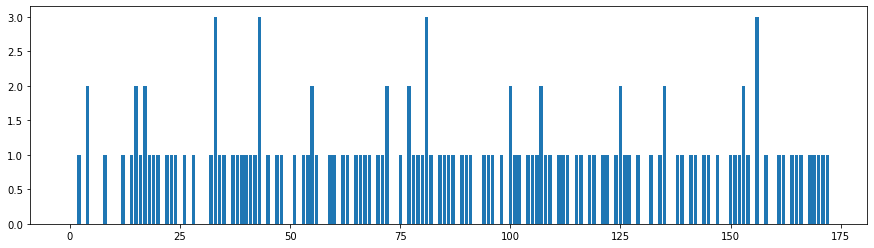

In [53]:
figure(figsize=(15,4))
bar(range(n_bouts), [len(tf.re[bout]) for bout in range(n_bouts)])

In [97]:
nickname = "B1"
tf=LoadTraj(nickname+'-tf')

for bout in range(len(tf.no)):
    print("Bout: %2d; visits to water port: %d" % (bout, sum(tf.no[bout][:,0]==rwd_node)))

Bout:  0; visits to water port: 0
Bout:  1; visits to water port: 0
Bout:  2; visits to water port: 0
Bout:  3; visits to water port: 0
Bout:  4; visits to water port: 0
Bout:  5; visits to water port: 0
Bout:  6; visits to water port: 0
Bout:  7; visits to water port: 0
Bout:  8; visits to water port: 0
Bout:  9; visits to water port: 0
Bout: 10; visits to water port: 0
Bout: 11; visits to water port: 0
Bout: 12; visits to water port: 0
Bout: 13; visits to water port: 0
Bout: 14; visits to water port: 0
Bout: 15; visits to water port: 0
Bout: 16; visits to water port: 0
Bout: 17; visits to water port: 6
Bout: 18; visits to water port: 0
Bout: 19; visits to water port: 6
Bout: 20; visits to water port: 2
Bout: 21; visits to water port: 0
Bout: 22; visits to water port: 0
Bout: 23; visits to water port: 2
Bout: 24; visits to water port: 0
Bout: 25; visits to water port: 0
Bout: 26; visits to water port: 0
Bout: 27; visits to water port: 2
Bout: 28; visits to water port: 0
Bout: 29; visi

Text(0, 0.5, 'Count')

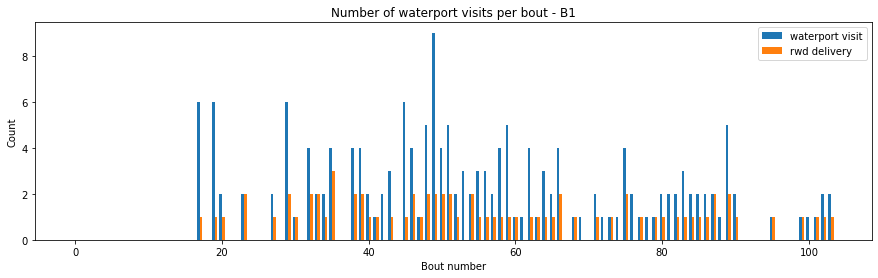

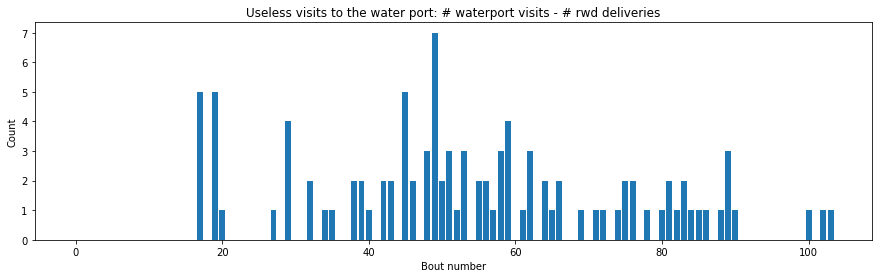

In [98]:
n_bouts = len(tf.no)

waterport_visits = [sum(tf.no[bout][:,0]==rwd_node) for bout in range(n_bouts)]
rwd_deliveries = [len(tf.re[bout]) for bout in range(n_bouts)]

figure(figsize=(15,4))
width = .35
bar(arange(n_bouts)-width/2, waterport_visits, width, label='waterport visit')
bar(arange(n_bouts)+width/2, rwd_deliveries, width, label='rwd delivery')
xlabel('Bout number')
ylabel('Count')
# xlim(0,100)
title('Number of waterport visits per bout - %s' % nickname)
legend()

useless_visits = array(waterport_visits)-(rwd_deliveries)
figure(figsize=(15,4))
title('Useless visits to the water port: # waterport visits - # rwd deliveries')
bar(arange(n_bouts), useless_visits)
xlabel('Bout number')
ylabel('Count')

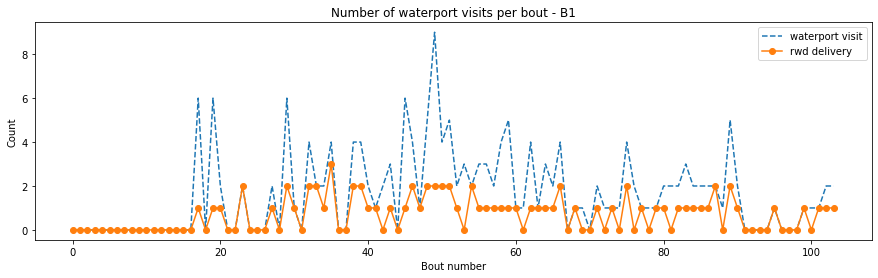

In [110]:
figure(figsize=(15,4))
width = .35
plt.plot(arange(n_bouts), waterport_visits, '--', label='waterport visit')
plt.plot(arange(n_bouts), rwd_deliveries, '-o', label='rwd delivery')
xlabel('Bout number')
ylabel('Count')
# xlim(0,100)
title('Number of waterport visits per bout - %s' % nickname)
legend()

In [94]:
import random as ran

Text(0, 0.5, 'rwd deliveries')

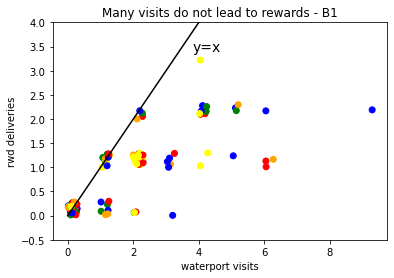

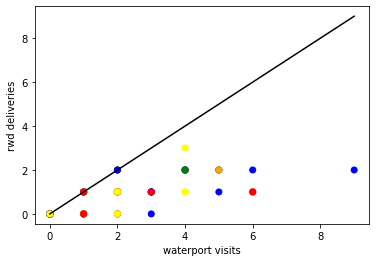

In [99]:
colors = ['red', 'green', 'blue', 'orange', 'yellow']
n_bouts = len(waterport_visits)
cs = random.choice(colors, n_bouts)
# cs = ['red', 'green', 'blue', 'orange', 'yellow']*34+['red', 'green', 'blue']

noise_lvl = .3
figure()
title("Many visits do not lead to rewards - %s" % nickname)
scatter(array(waterport_visits)+random.rand(n_bouts)*noise_lvl, array(rwd_deliveries)+random.rand(n_bouts)*noise_lvl, color=cs)
plt.plot(arange(10), arange(10), 'k')
xlabel('waterport visits')
ylabel('rwd deliveries')
text(3.8,3.4,"y=x", fontsize=14)
ylim(-.5, 4)

figure()
scatter(array(waterport_visits), array(rwd_deliveries), color=cs)
plt.plot(arange(10), arange(10), 'k')
xlabel('waterport visits')
ylabel('rwd deliveries')

In [23]:
nickname = "C1"
tf=LoadTraj(nickname+'-tf')

Text(0.5, 0, 'Bout')

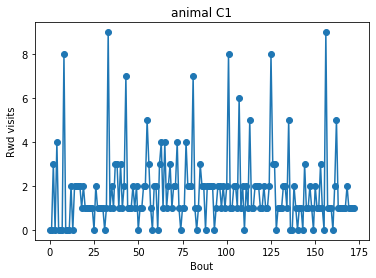

In [72]:
rwd_visits_in_bouts = [sum(tf.no[bout][:,0]==rwd_node) for bout in arange(len(tf.no))]
plt.plot(arange(len(tf.no)), rwd_visits_in_bouts, 'o-')
plt.title('animal %s' % nickname)
plt.ylabel("Rwd visits")
plt.xlabel("Bout")

In [29]:
n_bouts = len(tf.no)



# Waterport visit intervals

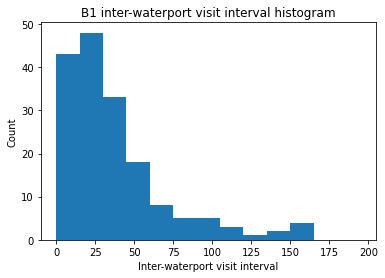

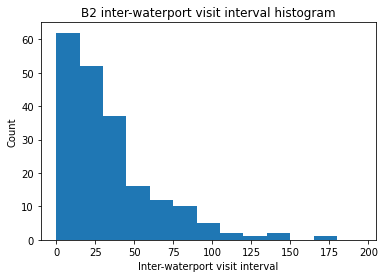

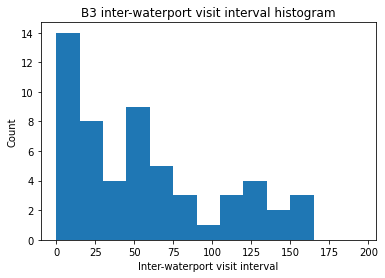

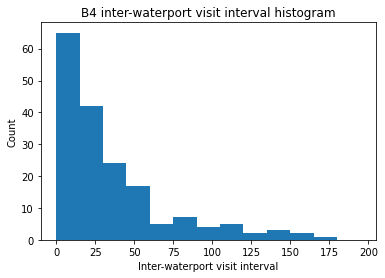

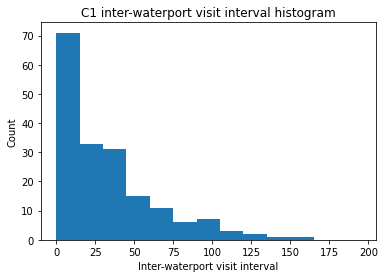

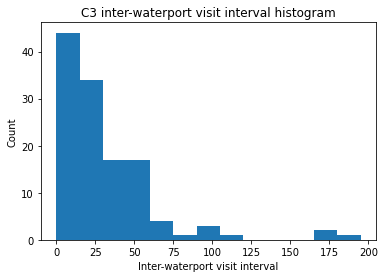

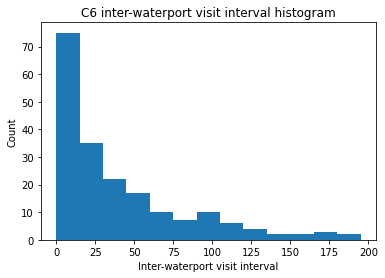

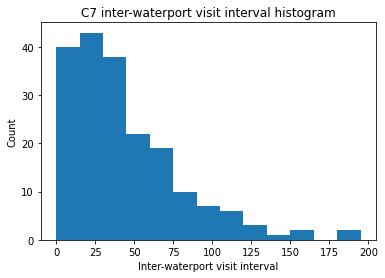

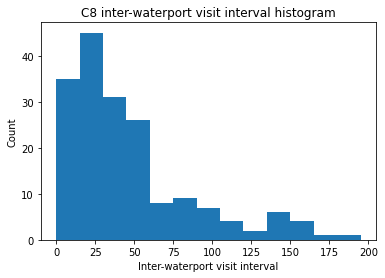

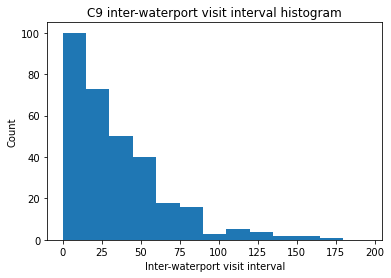

In [111]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
    
    # calculate waterport visits
    frs_to_waterport_visits = []
    for bout in range(n_bouts):
        bout_init_fr = tf.fr[bout,0]
        rwd_node_visits = tf.no[bout][tf.no[bout][:,0]==rwd_node]
        if len(rwd_node_visits)>0:
            frs_to_waterport_visits.append(bout_init_fr + rwd_node_visits[:,1])

    frs_to_waterport_visits = np.concatenate(frs_to_waterport_visits)
    frs_to_waterport_visits

    times_to_waterport_visits = np.array([TimeInMaze(frame_to_waterport_visit,tf) 
                                             for frame_to_waterport_visit in frs_to_waterport_visits])
    
    plt.figure()
    plt.hist(times_to_waterport_visits[1:]-times_to_waterport_visits[:-1], bins=arange(0,200, 15))
    plt.title("%s inter-waterport visit interval histogram" % nickname)
    plt.xlabel('Inter-waterport visit interval')
    plt.ylabel('Count')

# Reward delivery intervals

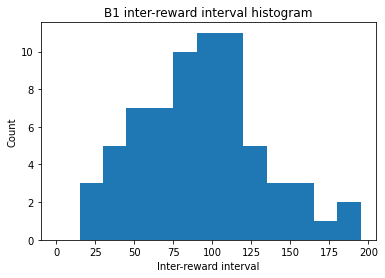

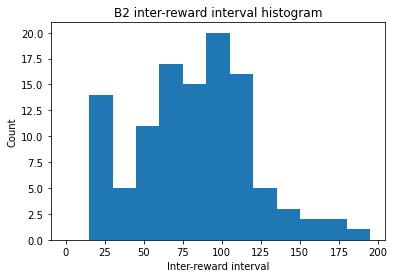

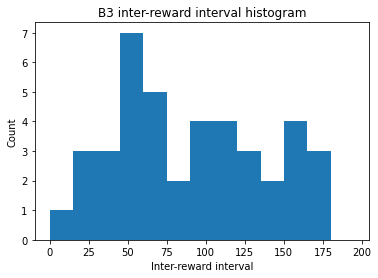

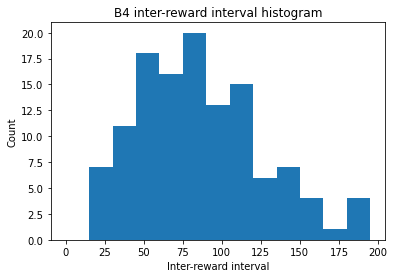

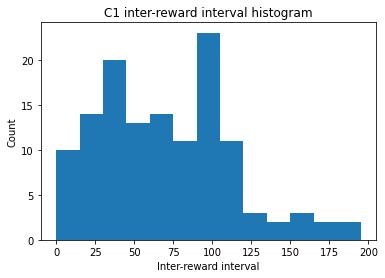

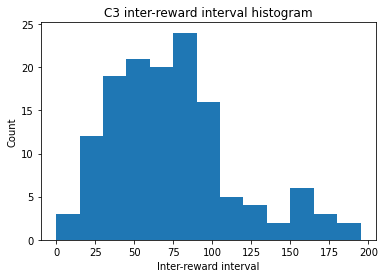

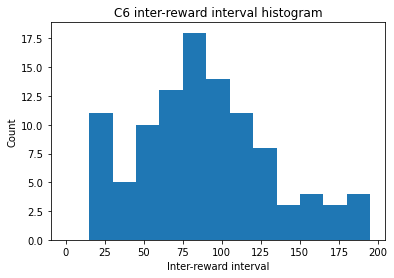

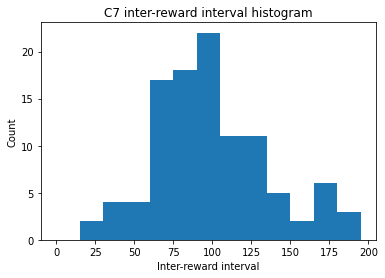

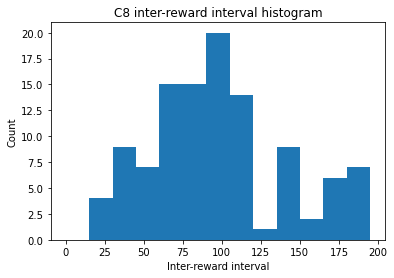

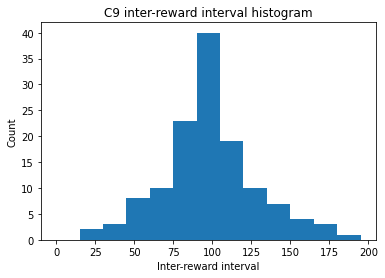

In [83]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
    frames_to_rwd = np.array([init_fr_rwd[0]+tf.fr[bout_idx,0] for bout_idx, frs_rwd in enumerate(tf.re) for init_fr_rwd in frs_rwd])
    times_to_rwd = np.array([TimeInMaze(frame_to_rwd,tf) for frame_to_rwd in frames_to_rwd])
    plt.figure()
    plt.hist(times_to_rwd[1:]-times_to_rwd[:-1], bins=arange(0,200, 15))
    plt.title("%s inter-reward interval histogram" % nickname)
    plt.xlabel('Inter-reward interval')
    plt.ylabel('Count')

I think there are times smaller than 90s because this is time on maze. It means that the animal spent time at the home cage instead of at the maze.

To correct this, I think I have to use the frame divided by the frame rate instead of using the function time in maze